In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# we will get the same results every time we run the same program
random.seed(42)

In [2]:
df=pd.read_csv('Data/data_clean.csv')
df.head()

,student_id,timestamp,group,landing_page,satisfied
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,experiment,new_page,0
3,853541,28:03.1,experiment,new_page,0
4,864975,52:26.2,control,old_page,1


In [4]:
!pip install statsmodels

  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [6]:
import statsmodels.api as sm
df2 = df
# Prepare the built-in parameters
convert_old = df2.query('landing_page == "old_page"').satisfied.sum()
convert_new = df2.query('landing_page == "new_page"').satisfied.sum()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

# Calculate Z-score and p-value

z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
z_score, p_value

(-0.5525565464894653, 0.7097164480543565)

Text(0, 0.5, 'satisfaction rate')

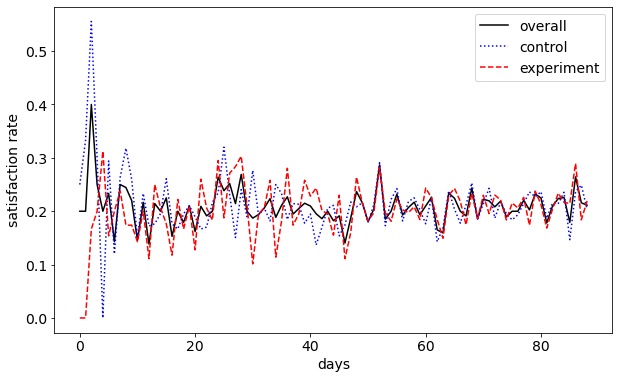

In [50]:
# creating time line satisfaction
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 6))
mx = 20000
df=df.sort_values(by="timestamp")
index = 0
sample_size = 5
results=dict()
results['overall_satisfaction']=[]
results['control_satisfaction']=[]
results['experiment_satisfaction']=[]
#a = dict('satisfaction':list(),'control_satisfaction':[],'experiment_satisfaction':[])
while index < mx:
    df_temp = df.iloc[index:index+sample_size]
    #print(df_temp.shape[0])
    index += sample_size
    sample_size += 5
    results['overall_satisfaction'].append(df_temp.satisfied.mean())
    results['control_satisfaction'].append(df_temp.query('group=="control"').satisfied.mean())
    results['experiment_satisfaction'].append(df_temp.query('group=="experiment"').satisfied.mean())
plt.plot( results['overall_satisfaction'],'k',color='k',label='overall')
plt.plot( results['control_satisfaction'],'k:',color='b',label='control')
plt.plot( results['experiment_satisfaction'],'k--',color='r',label='experiment')
plt.legend(loc='upper right')
plt.xlabel('days')
plt.ylabel('satisfaction rate')

Text(0, 0.5, 'number of samples')

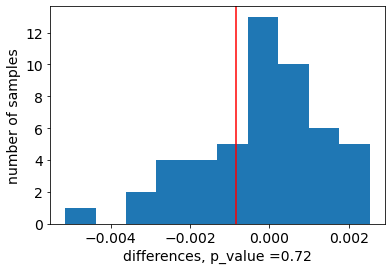

In [51]:
sat_rate=df.satisfied.mean()
n_old=df.query('group=="control"').shape[0]
n_new=df.query('group=="experiment"').shape[0]

sample_size=50

new_converted_simulation = np.random.binomial(n_new, sat_rate, sample_size)/n_new
old_converted_simulation = np.random.binomial(n_old, sat_rate, sample_size)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
df2=df

obs_diff = df2['satisfied'][df2['group'] == 'experiment'].mean() - df2['satisfied'][df2['group'] == 'control'].mean()
len(p_diffs[p_diffs > obs_diff])/len(p_diffs)
pvalue=np.round(len(p_diffs[p_diffs > obs_diff])/len(p_diffs),3)

plt.rcParams.update({'font.size': 14})
plt.hist(p_diffs)
plt.axvline(obs_diff, color = 'red')
plt.xlabel("differences, p_value =" + str(pvalue))
plt.ylabel("number of samples")